## **Task 3: Correlation between news and stock movement**

- Date Alignment: Ensure that both datasets (news and stock prices) are aligned by dates. This might involve normalizing timestamps.
- Sentiment Analysis: Conduct sentiment analysis on news headlines to quantify the tone of each article (positive, negative, neutral).Tools: Use Python libraries like nltk, TextBlob for sentiment analysis.
- Analysis:
  - Calculate Daily Stock Returns: Compute the percentage change in daily closing prices to represent stock movements.
  - Correlation Analysis: Use statistical methods to test the correlation between daily news sentiment scores and stock returns.

In [1]:
import os 
import sys

sys_path = os.path.abspath("..")
if sys_path not in sys.path:
    sys.path.append(sys_path)

%load_ext autoreload
%autoreload 2

In [2]:
from scripts.News_Stock_Correlation_Util import NewsStockCorrelationAnalyzer

Local punkt tokenizer found.


In [3]:
# creating instance using NewsStockCorrelationAnalyzer class
analysis = NewsStockCorrelationAnalyzer()

#### loading financial news data 

In [4]:
# reading financial news data 
news_data = analysis.load_news_data('../data/raw_analyst_ratings.csv')
news_data

----------------Loading FNSPID data from ../data/raw_analyst_ratings.csv------------


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00-04:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00-04:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00-04:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00-04:00,ZX


In [ ]:
# extracting headlines by date 
daily_news = news_data.groupby('date')['headline'].apply(list).reset_index()
daily_news

,date,headline
0,2009-02-14 00:00:00-04:00,[How Treasuries and ETFs Work]
1,2009-04-27 00:00:00-04:00,[Update on the Luxury Sector: 2nd Quarter 2009...
2,2009-04-29 00:00:00-04:00,[Going Against the Herd]
3,2009-05-22 00:00:00-04:00,[Charles Sizemore Radio Interview Saturday Mor...
4,2009-05-27 00:00:00-04:00,[MRM a $15-$20+ stock - FIT new information - ...
...,...,...
39952,2020-06-11 16:49:41-04:00,[7 Stocks Moving In Thursday's After-Hours Ses...
39953,2020-06-11 16:51:33-04:00,"[Financials, Energy Among Worst-Hit Sectors In..."
39954,2020-06-11 17:01:39-04:00,"[Twitter Removes About 174,000 China-Linked Ac..."
39955,2020-06-11 17:11:20-04:00,[PG&E Corp Reports CPUC Approved Co.'s Microgr...


#### reading stock data

In [12]:
# Reading stock price data
stock_data = analysis.fetch_stock_data()
stock_data

,date,open,high,low,close,adj_close,volume,dividends,stock_splits,ticker
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...,...
45423,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,TSLA
45424,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,TSLA
45425,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,TSLA
45426,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,TSLA


#### Calculating sentiment analysis for financial news data 

In [6]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from textblob import TextBlob

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_headline(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = wordpunct_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing
news_data['cleaned_headline'] = news_data['headline'].apply(preprocess_headline)

# Calculate sentiment polarity on cleaned headlines
news_data['sentiment'] = news_data['cleaned_headline'].apply(
    lambda x: TextBlob(x).sentiment.polarity if x else 0.0
)

# Group by date to compute average sentiment
news_data['date'] = pd.to_datetime(news_data['date'], utc=True).dt.date
daily_sentiment = news_data.groupby('date')['sentiment'].mean().reset_index()

# Display results
print(daily_sentiment.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


         date  sentiment
0  2009-02-14   0.000000
1  2009-04-27   0.000000
2  2009-04-29   0.000000
3  2009-05-22   0.000000
4  2009-05-27   0.234091


In [10]:
news_data.to_csv("../data/sentiment_fND.csv")

In [ ]:
# Describe financial news data sentiments 
news_data['sentiment'].describe()

count    1.407328e+06
mean     5.304646e-02
std      1.844367e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: sentiment, dtype: float64

In [23]:
# Function to categorize polarity scores
def categorize_sentiment(score):
    if isinstance(score, float) or isinstance(score, int):  # Ensure score is numeric
        if score >= 0.05:
            return 'positive'
        elif score <= -0.05:
            return 'negative'
        else:
            return 'neutral'
    return 'neutral'  # Handle non-numeric values

news_data['l_sentiment'] = news_data['sentiment'].apply(categorize_sentiment)

  Sentiment  Percentage
0   neutral   69.806115
1  positive   23.677849
2  negative    6.516036


C:\Users\jonep\AppData\Local\Temp\ipykernel_4504\1899555483.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




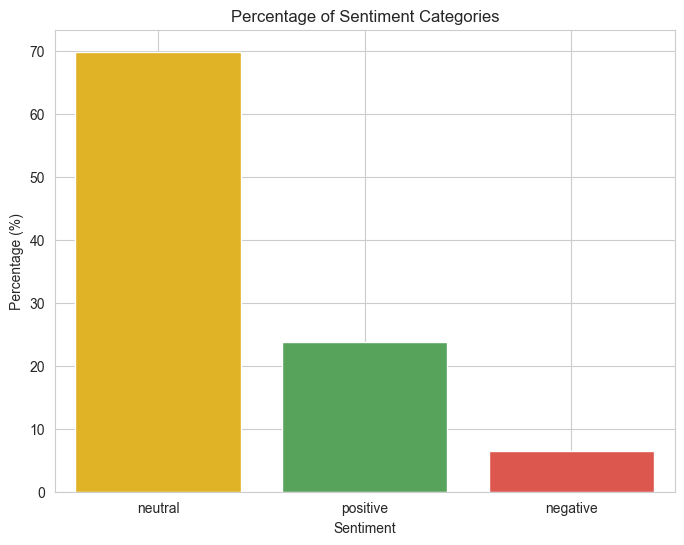

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages
sentiment_percentages = news_data['l_sentiment'].value_counts(normalize=True) * 100
percentage_df = pd.DataFrame({
    'Sentiment': sentiment_percentages.index,
    'Percentage': sentiment_percentages.values
})
print(percentage_df)
# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=percentage_df, x='Sentiment', y='Percentage',
            palette={'positive': '#4CAF50', 'neutral': '#FFC107', 'negative': '#F44336'})
plt.title('Percentage of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.grid(True)
plt.show()

#### calculating daily returns of the stock price data

In [26]:
# calculate daily return on close features of stock data
analysis.calculate_daily_returns(stock_data)

Local punkt tokenizer found.
Calculating daily stock returns...


,date,open,high,low,close,adj_close,volume,dividends,stock_splits,ticker,Daily_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL,-5.217061
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL,-7.339788
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL,2.475091
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL,2.899246
...,...,...,...,...,...,...,...,...,...,...,...
45423,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,TSLA,-12.334605
45424,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,TSLA,1.972311
45425,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,TSLA,-0.204312
45426,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,TSLA,5.595998


#### aligning financial news data with stock price data using date 

In [36]:
# merging news and stock price data or aligning by dates
merged_df = analysis.align_datasets(stock_data, news_data)
merged_df

Local punkt tokenizer found.
Aligning datasets by date...


,date,open,high,low,close,adj_close,volume,dividends,stock_splits,ticker,Daily_Return,Unnamed: 0,headline,url,publisher,stock,cleaned_headline,sentiment,l_sentiment
0,2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,AAPL,0.669889,522587,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,FT,update luxury sector quarter,0.000000,neutral
1,2009-04-27,4.389286,4.464286,4.380714,4.454643,3.761836,480690000,0.0,0.0,AAPL,0.669889,1396488,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,Y,update luxury sector quarter,0.000000,neutral
2,2009-04-29,4.458929,4.530357,4.422500,4.469286,3.774201,458110800,0.0,0.0,AAPL,1.000808,1834,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,A,going herd,0.000000,neutral
3,2009-05-22,4.430357,4.435000,4.348214,4.375000,3.694580,297998400,0.0,0.0,AAPL,-1.352874,68387,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,AM,charles sizemore radio interview saturday morning,0.000000,neutral
4,2009-05-27,4.706429,4.820714,4.675357,4.751786,4.012765,646422000,0.0,0.0,AAPL,1.735759,430147,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,EPS,mrm stock fit new information jva supertrades ...,0.268182,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9287934,2020-06-11,66.013336,67.930664,64.800003,64.856003,64.856003,238747500,0.0,0.0,TSLA,-5.093410,1402389,"Shares of several hotels, restaurants & leisur...",https://www.benzinga.com/wiim/20/06/16233044/s...,Benzinga Newsdesk,YUM,share several hotel restaurant leisure company...,0.000000,neutral
9287935,2020-06-11,66.013336,67.930664,64.800003,64.856003,64.856003,238747500,0.0,0.0,TSLA,-5.093410,1402390,Morgan Stanley Maintains Overweight on Yum Bra...,https://www.benzinga.com/news/20/06/16231689/m...,Benzinga Newsdesk,YUM,morgan stanley maintains overweight yum brand ...,0.000000,neutral
9287936,2020-06-11,66.013336,67.930664,64.800003,64.856003,64.856003,238747500,0.0,0.0,TSLA,-5.093410,1402391,"Credit Suisse Maintains Neutral on Yum Brands,...",https://www.benzinga.com/news/20/06/16231164/c...,Benzinga Newsdesk,YUM,credit suisse maintains neutral yum brand rais...,0.000000,neutral
9287937,2020-06-11,66.013336,67.930664,64.800003,64.856003,64.856003,238747500,0.0,0.0,TSLA,-5.093410,1402392,"UBS Maintains Buy on Yum Brands, Raises Price ...",https://www.benzinga.com/news/20/06/16230653/u...,Benzinga Newsdesk,YUM,ubs maintains buy yum brand raise price target,0.000000,neutral


#### analysis of publishers with positive sentiments 

In [91]:
merged_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'dividends', 'stock_splits', 'ticker', 'Daily_Return', 'Unnamed: 0',
       'headline', 'url', 'publisher', 'stock', 'cleaned_headline',
       'sentiment', 'l_sentiment'],
      dtype='object')

In [97]:
# Compute sentiment counts per publisher
sentiment_counts = merged_df.groupby('publisher')['l_sentiment'].value_counts().unstack(fill_value=0)

# Compute percentage of positive sentiments per publisher
sentiment_percentages = merged_df.groupby('publisher')['l_sentiment'].value_counts(normalize=True).unstack(fill_value=0) * 100
sentiment_percentages = sentiment_percentages.round(2)
sentiment_percentages = sentiment_percentages.get('positive', pd.Series()).rename('Positive (%)')

# Filter publishers with positive sentiments (>0%)
positive_publishers = sentiment_percentages[sentiment_percentages > 0].dropna().reset_index()
positive_publishers.columns = ['publisher', 'Positive (%)']

# Add counts of positive sentiments
positive_counts = sentiment_counts['positive'].reset_index().rename(columns={'positive': 'Positive Count'})
combined_df = pd.merge(positive_publishers, positive_counts, on='publisher')

# Sort by Positive (%) in descending order and filter top 10
top_10_publishers = combined_df.sort_values(by='Positive (%)', ascending=False).head(50)
top_10_publishers


,publisher,Positive (%),Positive Count
671,pagetraffic,100.0,6
665,mattzinga,100.0,14
663,marketresearch,100.0,11
656,javierhasseandericterbush@benzinga.com,100.0,7
547,Stephen Bigalow,100.0,18
22,Allan Farley,100.0,7
655,janaviktoria,100.0,7
650,giovannimola,100.0,7
632,Yoav Helfman,100.0,21
646,dhiraj.surapaneni@benzinga.com,100.0,7


#### analysis of sentiments per tickers 

Sentiment Value Counts and Percentages by Ticker:
   ticker sentiment   Count Percentage
0    AAPL  negative   89809      6.51%
1    AMZN  negative   89809      6.51%
2    GOOG  negative   89809      6.51%
3    META  negative   67095      6.41%
4    MSFT  negative   89809      6.51%
5    NVDA  negative   89809      6.51%
6    TSLA  negative   87285       6.5%
7    AAPL   neutral  962860     69.79%
8    AMZN   neutral  962860     69.79%
9    GOOG   neutral  962860     69.79%
10   META   neutral  727228     69.51%
11   MSFT   neutral  962860     69.79%
12   NVDA   neutral  962860     69.79%
13   TSLA   neutral  939945     69.97%
14   AAPL  positive  327013      23.7%
15   AMZN  positive  327013      23.7%
16   GOOG  positive  327013      23.7%
17   META  positive  251839     24.07%
18   MSFT  positive  327013      23.7%
19   NVDA  positive  327013      23.7%
20   TSLA  positive  316137     23.53%


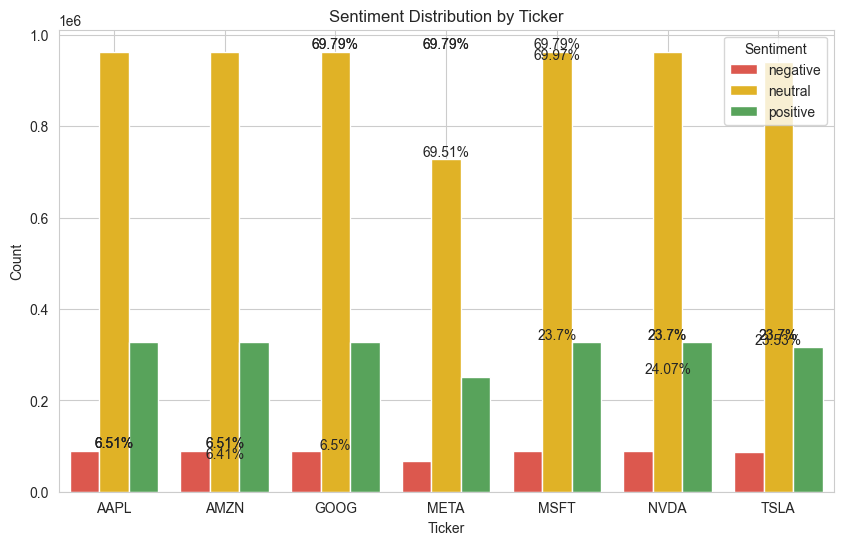

In [ ]:
sentiment_counts = merged_df.groupby('ticker')['l_sentiment'].value_counts().unstack(fill_value=0)
# Compute percentages of sentiments per ticker
sentiment_percentages = merged_df.groupby('ticker')['l_sentiment'].value_counts(normalize=True).unstack(fill_value=0) * 100
sentiment_percentages = sentiment_percentages.round(2)
sentiment_percentages = sentiment_percentages.add_suffix(' (%)')

# Combine counts and percentages into one DataFrame
counts_flat = sentiment_counts.reset_index().melt(id_vars='ticker', var_name='sentiment', value_name='Count')
percentages_flat = sentiment_percentages.reset_index().melt(id_vars='ticker', var_name='sentiment', value_name='Percentage')
percentages_flat['sentiment'] = percentages_flat['sentiment'].str.replace(' (%)', '')
combined_df = pd.merge(counts_flat, percentages_flat, on=['ticker', 'sentiment'])
combined_df['Percentage'] = combined_df['Percentage'].astype(str) + '%'

# Display the combined DataFrame
print("Sentiment Value Counts and Percentages by Ticker:")
print(combined_df)

# Visualize with Seaborn (stacked bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='ticker', y='Count', hue='sentiment',
            palette={'positive': '#4CAF50', 'neutral': '#FFC107', 'negative': '#F44336'})
plt.title('Sentiment Distribution by Ticker')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(True)

# Add percentage labels on bars
for i, row in combined_df.iterrows():
    plt.text(i // 3, row['Count'], row['Percentage'], ha='center', va='bottom')

plt.show()

In [80]:
sentiment_counts

l_sentiment,negative,neutral,positive
ticker,,,
AAPL,89809,962860,327013
AMZN,89809,962860,327013
GOOG,89809,962860,327013
META,67095,727228,251839
MSFT,89809,962860,327013
NVDA,89809,962860,327013
TSLA,87285,939945,316137


In [ ]:
# Aggregate labeled sentiments by date 
daily_sentiment = merged_df.groupby('date')['l_sentiment'].agg(lambda x: x.mode().iloc[0] if not x.empty else None).reset_index()
daily_sentiment

,date,l_sentiment
0,2009-04-27,neutral
1,2009-04-29,neutral
2,2009-05-22,neutral
3,2009-05-27,positive
4,2009-05-29,positive
...,...,...
2752,2020-06-05,positive
2753,2020-06-08,positive
2754,2020-06-09,neutral
2755,2020-06-10,neutral


In [47]:
# daily sentiment on numerical sentiment values 
daily_sentiment_ = merged_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment_

,date,sentiment
0,2009-04-27,0.000000
1,2009-04-29,0.000000
2,2009-05-22,0.000000
3,2009-05-27,0.234091
4,2009-05-29,0.068182
...,...,...
2752,2020-06-05,0.118396
2753,2020-06-08,0.069246
2754,2020-06-09,0.013402
2755,2020-06-10,-0.010027


In [ ]:
# aggregating Daily returns by date
daily_Return_ = merged_df.groupby('date')['Daily_Return'].mean().reset_index()
daily_Return_

,date,Daily_Return
0,2009-04-27,-1.570325
1,2009-04-29,-0.015427
2,2009-05-22,-0.266553
3,2009-05-27,-0.090463
4,2009-05-29,0.808068
...,...,...
2752,2020-06-05,2.020984
2753,2020-06-08,1.382198
2754,2020-06-09,1.790033
2755,2020-06-10,2.920262


#### Find the correlation between sentiment and daily return 

In [60]:
# Creating correlation dataframe 
correlation_df = pd.merge(daily_Return_, daily_sentiment_, on='date', how='inner')
correlation_df = pd.merge(correlation_df,daily_sentiment, on ='date', how = 'inner')
correlation_df

,date,Daily_Return,sentiment,l_sentiment
0,2009-04-27,-1.570325,0.000000,neutral
1,2009-04-29,-0.015427,0.000000,neutral
2,2009-05-22,-0.266553,0.000000,neutral
3,2009-05-27,-0.090463,0.234091,positive
4,2009-05-29,0.808068,0.068182,positive
...,...,...,...,...
2752,2020-06-05,2.020984,0.118396,positive
2753,2020-06-08,1.382198,0.069246,positive
2754,2020-06-09,1.790033,0.013402,neutral
2755,2020-06-10,2.920262,-0.010027,neutral


In [88]:
# Correlation between
from scipy.stats import pearsonr 
correlation, p_value = pearsonr(correlation_df['Daily_Return'], correlation_df['sentiment'])
print(f"Correlation between daily returns and sentiments: {correlation}")

Correlation between daily returns and sentiments: 0.002454098278958313


- This indicates an extremely weak linear relationship between daily returns and sentiment. 
  - which means changes in sentiment have almost no linear association with changes in daily returns.
  - The positive value suggests a slight positive relationship, meaning that as sentiment becomes more positive, daily returns might increase slightly, but the effect is negligible due to the small magnitude.

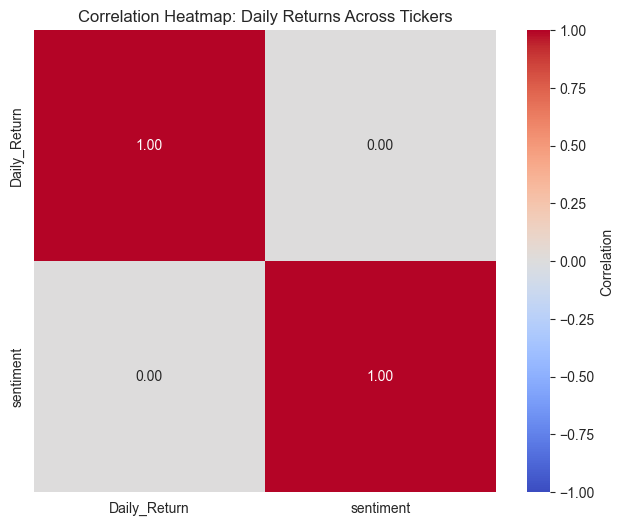

In [89]:
# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df[['Daily_Return','sentiment']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            fmt='.2f', square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap: Daily Returns Across Tickers')
plt.show()


C:\Users\jonep\AppData\Local\Temp\ipykernel_4504\1672143614.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



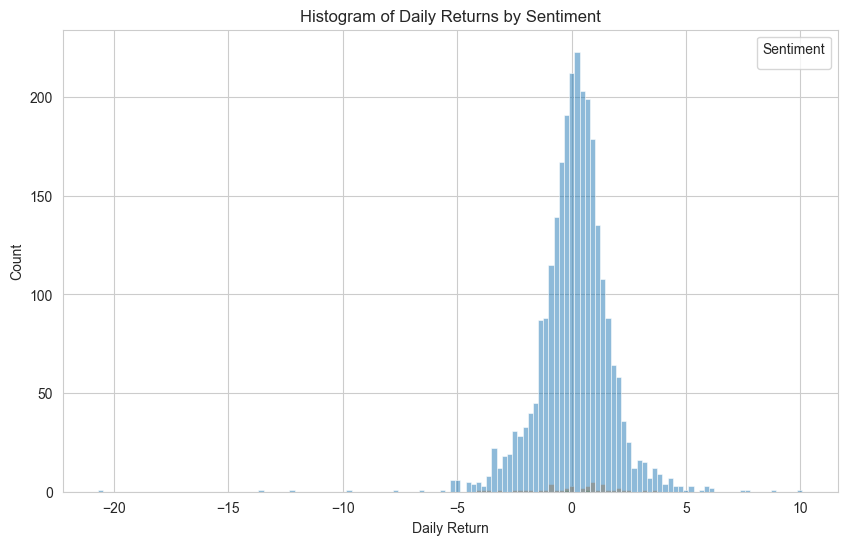

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set Seaborn style
sns.set_style("whitegrid")

# Create histogram with sentiment as color
plt.figure(figsize=(10, 6))
sns.histplot(data=correlation_df, x='Daily_Return', hue='l_sentiment', color='l_sentiment')

# Customize layout
plt.title('Histogram of Daily Returns by Sentiment')
plt.xlabel('Daily Return')
plt.ylabel('Count')
plt.legend(title='Sentiment')

# Show plot
plt.show()